In [39]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [40]:
df=pd.read_csv('/Users/lzh521/Desktop/archive/kaggle_predict-1/data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [42]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

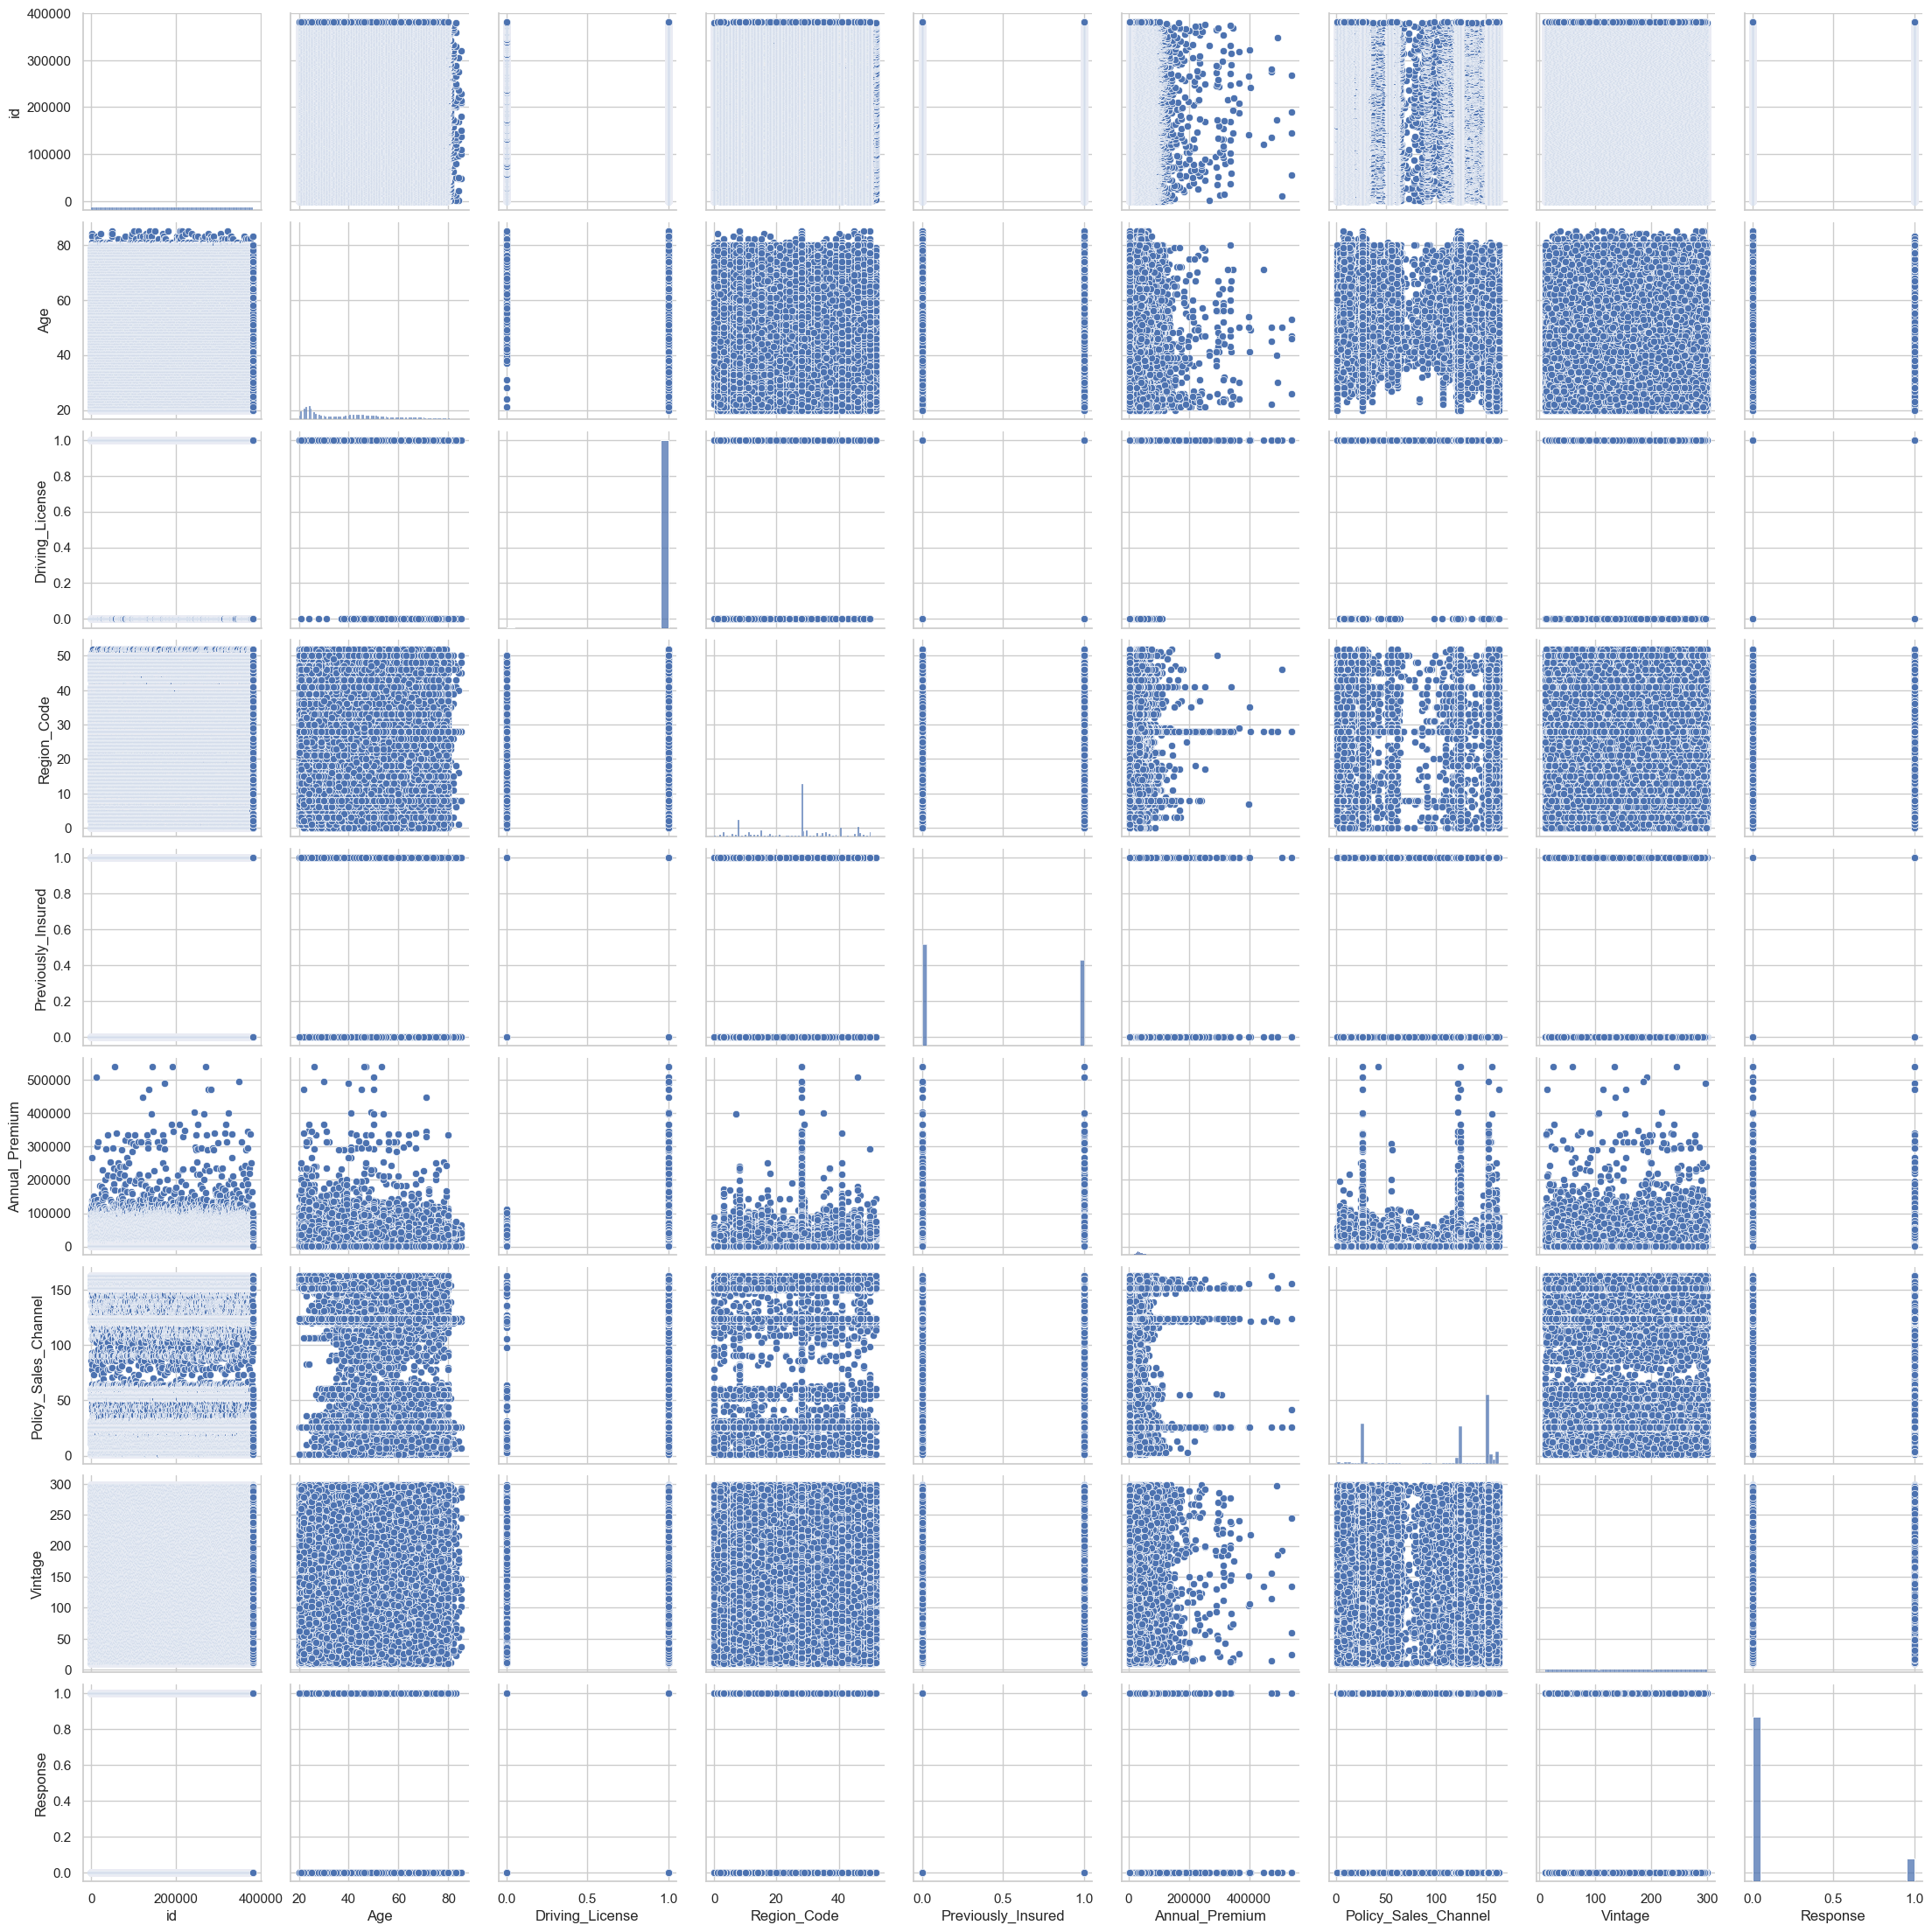

In [44]:
sns.set_theme(style="whitegrid")
sns.pairplot(df)
plt.show()

In [45]:
df.drop(['id'],axis=1).describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


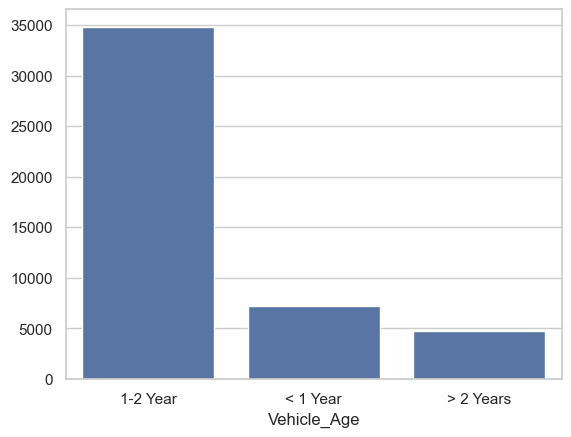

In [46]:
counts=df[df['Response']==1].groupby('Vehicle_Age').size()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel('Vehicle_Age')
plt.show()

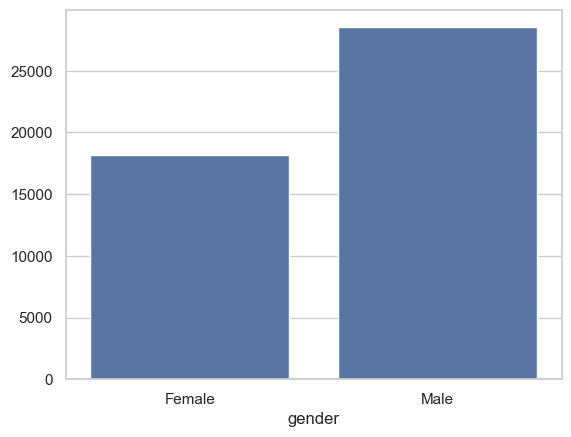

In [47]:
counts=df[df['Response']==1].groupby('Gender').size()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel('gender')
plt.show()

In [53]:
df['Gender'].head()


0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64

In [54]:
df['Gender'].unique()

array([1, 0])

In [52]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [57]:
df['Vehicle_Damage'].head()

0    1
1    0
2    1
3    0
4    0
Name: Vehicle_Damage, dtype: int64

In [58]:
df['Vehicle_Damage'].unique()

array([1, 0])

In [56]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})

In [59]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({"< 1 Year":0,"1-2 Year":1,"> 2 Years":2})

In [60]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [61]:
x_train=df.drop(['Response','id'],axis=1)
y_train=df['Response']

In [62]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [63]:
import sklearn
import sklearn.preprocessing 
scaler=sklearn.preprocessing.StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_smote)

In [4]:
import sklearn.model_selection


x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x_train_scaled,y_train_smote,test_size=0.2,random_state=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


NameError: name 'x_train_scaled' is not defined

In [3]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [66]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,random_state=0)
model.fit(x_train, y_train)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score
y_train_pred = model.predict(x_train)
y_train_prob = model.predict_proba(x_train)
print("训练集指标")
print("AUC:",roc_auc_score(y_train, y_train_prob[:, 1]))
print("准确率:",accuracy_score(y_train, y_train_pred))
print("精确率:",precision_score(y_train, y_train_pred))
print("召回率:",recall_score(y_train, y_train_pred))
print("F1:",f1_score(y_train, y_train_pred))